TypeError: 'int' object is not subscriptable

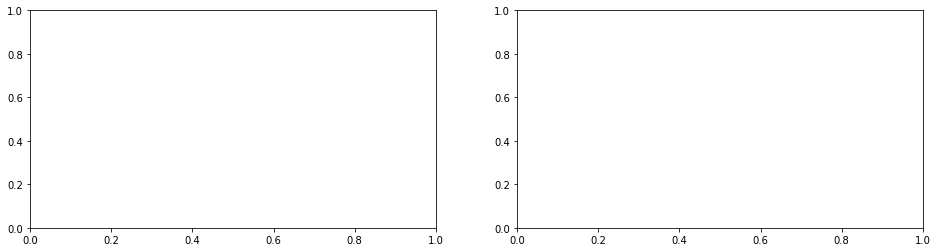

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from e7awgsw import CaptureUnit, CaptureCtrl
import numpy as np
from numpy import real, imag, array

convert = lambda x: x[:,0] + 1j * x[:,1]

# with open('HandaiExpRabi202204211457.pickle', 'rb') as f:
#     r = pickle.load(f)

with open('HandaiExpRabi202204251216.pickle', 'rb') as f:
    r = pickle.load(f)

    
fig, ax = plt.subplots(1, 2, figsize=(16,4))
for c, v in r.items():#[100, 500, 1000, 1500, 2000]:#range(100,2000,100):
    
    x = convert(array(v['data'][CaptureUnit.U0]))
    readout_freq = v['wparams']['readout_freq']
    num_chunk_repeats = v['wparams']['num_chunk_repeats']
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3

    s = slice(1500,3000)

    #ax[0].plot(time, real(x))
    #ax[0].plot(time[s], real(x)[s])


    y = x * np.exp(-1j*2*np.pi*readout_freq*time) / num_chunk_repeats
    ax[0].plot(time, real(y))
    ax[0].plot(time, imag(y))
    ax[0].plot(time[s], real(y)[s])
    ax[0].plot(time[s], imag(y)[s])
    #ax[0].plot(time, np.abs(y))


    z = y[s].mean()
    z = z / np.abs(z)
    # if c == 100:
    #     z0 = z
    # z = np.sqrt(z * z0.conj())
    ax[1].plot(real(z),imag(z),'o')
    ax[1].axis('equal')
    ax[1].set_xlim(-2,2)
    ax[1].set_ylim(-1,1)
    #ax[1].plot(c, np.angle(z),'o')
    #ax[1].plot(c, np.imag(z),'o')



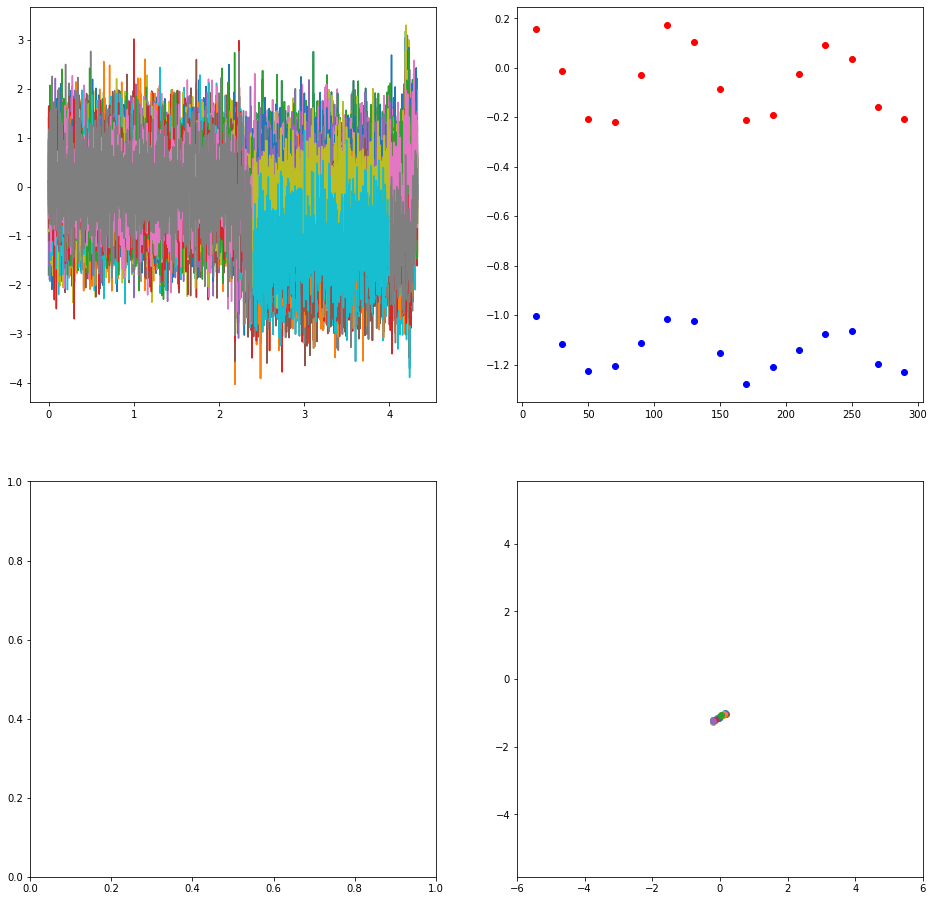

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from e7awgsw import CaptureUnit, CaptureCtrl
import numpy as np
from numpy import real, imag, array

convert = lambda x: x[:,0] + 1j * x[:,1]

with open('HandaiExpRabi202204251242.pickle', 'rb') as f:
    r = pickle.load(f)
    
fig, ax = plt.subplots(2, 2, figsize=(16,16))
for v in r['data']:#[100, 500, 1000, 1500, 2000]:#range(100,2000,100):
    
    c = v['wparams']['ctrl_wave_len']
    x = convert(array(v['data'][CaptureUnit.U0]))
    readout_freq = v['wparams']['readout_freq']
    num_chunk_repeats = v['wparams']['num_chunk_repeats']
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])

    s = slice(1200,2000)

    #ax[0].plot(time, real(x))
    #ax[0].plot(time[s], real(x)[s])


    y = x * np.exp(-1j*2*np.pi*readout_freq*time)/num_chunk_repeats
    ax[0,0].plot(time, real(y))
    ax[0,0].plot(time, imag(y))
    ax[0,0].plot(time[s], real(y)[s])
    ax[0,0].plot(time[s], imag(y)[s])
    #ax[0].plot(time, np.abs(y))


    z = y[s].mean()
    # z = z / np.abs(z)
    # if c == 100:
    #     z0 = z
    # z = np.sqrt(z * z0.conj())
    ax[0,1].plot(c,real(z),'ro')
    ax[0,1].plot(c,imag(z),'bo')
    ax[1,1].plot(real(z),imag(z),'o')
    ax[1,1].axis('equal')
    ax[1,1].set_xlim(-2,2)
    ax[1,1].set_ylim(-2,2)
    # ax[1].plot(c, np.angle(z),'o')




In [93]:
with open('HandaiExpRabi202204221653.pickle', 'rb') as f:
    r = pickle.load(f)

In [94]:
list(r)

[10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148]

In [95]:
data = [r[i] for i in range(10,150,2)]

In [97]:
rslt = {
    'ctrl_vatt': None, #r['ctrl_vatt'],
    'ctrl_rf_mhz': None, #r['ctrl_rf_mhz'],
    'ctrl_lo_mhz': None, #r['ctrl_lo_mhz'],
    'readout_vatt': None, #r['readout_vatt'],
    'readout_rf_mhz': None, #r['readout_rf_mhz'],
    'readout_lo_mhz': None, #r['readout_lo_mhz'],
    'data': data,
}

In [98]:
import pickle
with open('HandaiExpRabi202204221653_mod.pickle', 'wb') as f:
    pickle.dump(rslt, f)